In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

In [38]:
!pip install kneed

In [50]:
!pip install sklearn.cluster 

ERROR: Could not find a version that satisfies the requirement sklearn.cluster
ERROR: No matching distribution found for sklearn.cluster


In [2]:
credit = pd.read_csv('BankChurners.csv')

In [3]:
credit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
cols = ["Customer_Age", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Credit_Limit"]

In [5]:
data=credit[cols]
data.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,M,High School,Married,$60K - $80K,12691.0
1,49,F,Graduate,Single,Less than $40K,8256.0
2,51,M,Graduate,Married,$80K - $120K,3418.0


In [6]:
data.Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [7]:
#переводим категориальные переменные в числовые переменные
data_adj = data.copy()
data_adj.head(5)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,M,High School,Married,$60K - $80K,12691.0
1,49,F,Graduate,Single,Less than $40K,8256.0
2,51,M,Graduate,Married,$80K - $120K,3418.0
3,40,F,High School,Unknown,Less than $40K,3313.0
4,40,M,Uneducated,Married,$60K - $80K,4716.0


In [8]:
cat_col = ["Gender", "Education_Level", "Marital_Status", "Income_Category"]

In [9]:
for col in cat_col:
    labelencoder = LabelEncoder()
    data_adj[col] = labelencoder.fit_transform(data_adj[col])

In [51]:
data_adj.head(7)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,cluster
0,45,1,3,1,2,12691.0,1
1,49,0,2,2,4,8256.0,2
2,51,1,2,1,3,3418.0,1
3,40,0,3,3,4,3313.0,2
4,40,1,5,1,2,4716.0,1
5,44,1,2,1,1,4010.0,1
6,51,1,6,1,0,34516.0,0


Алгоритм Kmeans использует Euclidean для вычисления расстояния между двумя точками, это проблема, потому что на алгоритм больше будут влиять переменные с высокой величиной. Поэтому для подавления этого эффекта набор данных масштабируется. Стандартизация будет выполняться для набора данных, чтобы преобразовать его.



In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_adj)
scaled_data = pd.DataFrame(scaled_data, columns=data_adj.columns)

In [12]:
scaled_data

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,-0.165406,1.059956,-0.052637,-0.628128,-0.574182,0.446622
1,0.333570,-0.943436,-0.597678,0.727306,0.755053,-0.041367
2,0.583058,1.059956,-0.597678,-0.628128,0.090436,-0.573698
3,-0.789126,-0.943436,-0.052637,2.082739,0.755053,-0.585251
4,-0.789126,1.059956,1.037447,-0.628128,-0.574182,-0.430877
...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.597678,0.727306,-1.238799,-0.509330
10123,-0.664382,1.059956,1.582489,-1.983561,-1.238799,-0.479181
10124,-0.290150,-0.943436,-0.052637,-0.628128,0.755053,-0.354626
10125,-2.036565,1.059956,-0.597678,2.082739,-1.238799,-0.368710


In [34]:
X= scaled_data.values

In [37]:
X

array([[-0.16540558,  1.05995565, -0.0526366 , -0.62812757, -0.5741815 ,
         0.4466219 ],
       [ 0.33357038, -0.9434357 , -0.59767834,  0.72730561,  0.75505294,
        -0.04136665],
       [ 0.58305837,  1.05995565, -0.59767834, -0.62812757,  0.09043572,
        -0.5736978 ],
       ...,
       [-0.29014957, -0.9434357 , -0.0526366 , -0.62812757,  0.75505294,
        -0.3546256 ],
       [-2.03656544,  1.05995565, -0.59767834,  2.08273879, -1.23879873,
        -0.36870959],
       [-0.41489356, -0.9434357 , -0.59767834, -0.62812757,  0.75505294,
         0.19321995]])

Выбор K

Метод локтя будет использоваться при выборе числа K кластера для нашей сегментации клиентов.

In [41]:
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

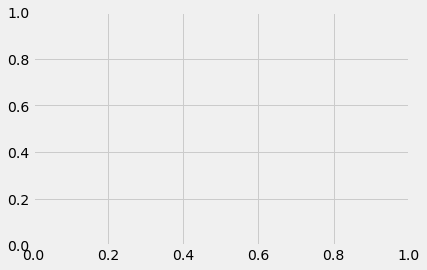

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [39]:
K1 = KneeLocator(np.arange(1, 10, 1), sse, curve="convex", direction="decreasing")
K1.elbow

ValueError: x and y arrays must be equal in length along interpolation axis.

Кластеризация

In [43]:
#model
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=10)

In [44]:
cluster = kmeans.labels_
cluster

array([1, 2, 1, ..., 2, 1, 2])

In [45]:
data_adj['cluster'] = cluster

In [46]:
data_adj.head()

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,cluster
0,45,1,3,1,2,12691.0,1
1,49,0,2,2,4,8256.0,2
2,51,1,2,1,3,3418.0,1
3,40,0,3,3,4,3313.0,2
4,40,1,5,1,2,4716.0,1


In [47]:
means = data_adj.groupby('cluster').mean()

In [48]:
means

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
cluster,,,,,,
0,46.462667,0.942667,3.108000,1.542667,2.080667,27379.796000
1,46.234136,0.769338,3.087541,1.435387,1.764937,6107.203729
2,46.370388,0.007658,3.101648,1.463913,4.237874,4635.691669
